In [24]:
import cv2 as cv 
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np

In [19]:
img = cv.imread("1.jpg")

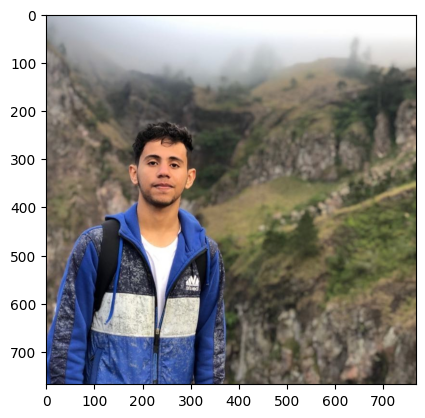

In [20]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)
print(results)

1/1 [==============================] - 0s 104ms/step
[{'box': [189, 259, 104, 133], 'confidence': 0.9998503923416138, 'keypoints': {'left_eye': (222, 310), 'right_eye': (266, 313), 'nose': (244, 330), 'mouth_left': (221, 357), 'mouth_right': (263, 359)}}]


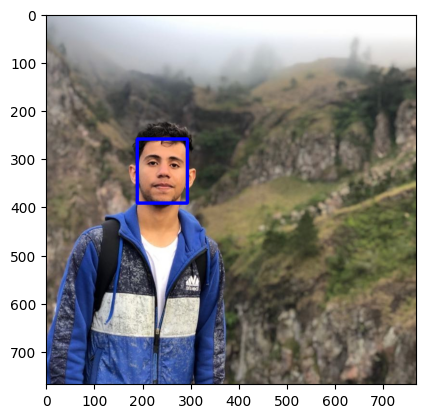

In [21]:
x, y, w, h = results[0]['box']

img = cv.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 5)
plt.imshow(img)

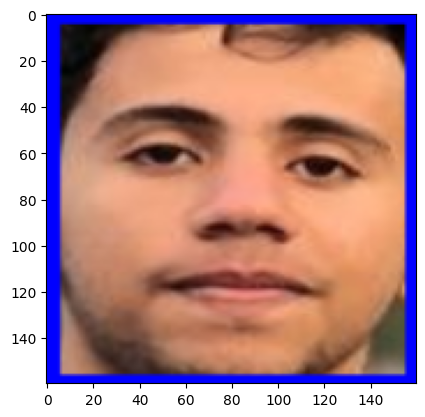

In [23]:
face = img[y:y+h, x:x+w]\
#facenet takes inputs size as 160x160
face = cv.resize(face, (160,160))
plt.imshow(face)

In [ ]:
# automate the script 

class FaceLoader:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.detector = MTCNN()
        self.X = []
        self.Y = []
    
    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_array = cv.resize(face, self.target_size)
        return face_array
    
    def load_faces(self, dir):
        FACES = []
        for img_name  in os.listdir(dir):
            try: 
                path = dir + img_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except:
                pass 
            return FACES 
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir + '/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)
    